# 1.1 Introdução ao modelo de Perceptron

## Explicação conceitual detalhada

### 🔍 O Que é um Perceptron?

O **Perceptron** é o modelo mais simples de uma rede neural artificial, proposto por **Frank Rosenblatt em 1958**. Ele é a base para modelos mais complexos de redes neurais e tem como objetivo simular o comportamento de um **neurônio biológico**, ou seja, aprender a classificar padrões com base em entradas e pesos.

### 🧠 Estrutura do Perceptron

O perceptron é composto por:

- **Entradas (x₁, x₂, ..., xₙ):** são os dados de entrada (valores numéricos).
- **Pesos (w₁, w₂, ..., wₙ):** cada entrada é multiplicada por um peso, que determina a importância daquela entrada.
- **Bias (b):** é um valor fixo que permite ao modelo ajustar o limiar de ativação, deslocando a função de ativação para melhor aprendizado.
- **Função Somatória:** calcula a soma ponderada das entradas com seus respectivos pesos e adiciona o bias.
- **Função de Ativação:** decide se o neurônio será ativado ou não (isto é, se a saída será 1 ou 0).

### 📐 Funcionamento Matemático

A saída do perceptron é dada por:

\\[
u = x_1 w_1 + x_2 w_2 + \\ldots + x_n w_n + b
\\]

Esse valor \\( u \\) é passado por uma **função de ativação**, normalmente o **degrau unitário**:

\\[
f(u) = 
\\begin{cases}
1 & \\text{se } u \\geq 0 \\\\
0 & \\text{se } u < 0
\\end{cases}
\\]


### 🔄 Processo de Aprendizado (Treinamento)

Durante o treinamento, o perceptron ajusta seus pesos e o bias com base no erro cometido ao prever a saída. O processo segue os seguintes passos:

1. **Inicialização:** os pesos e bias começam com valores aleatórios ou zerados.
2. **Cálculo da saída:** calcula a soma ponderada e aplica a função de ativação.
3. **Cálculo do erro:** compara a saída obtida com a saída desejada.
4. **Atualização dos pesos e bias:**

\\[
w_i = w_i + \\eta (y_{desejado} - y_{predito}) x_i
\\]
\\[
b = b + \\eta (y_{desejado} - y_{predito})
\\]

Onde \\( \\eta \\) é a **taxa de aprendizado**, um valor pequeno que controla o quão grande é o passo de correção.


### ✅ Quando o Perceptron Aprende?

O perceptron aprende corretamente **quando todos os erros de classificação são eliminados**, ou seja, quando o modelo consegue prever corretamente todas as saídas esperadas do conjunto de treinamento. Isso acontece apenas se os dados forem **linearmente separáveis**.

### 🎯 Aplicação

O perceptron é útil para introduzir conceitos fundamentais de redes neurais:
- Cálculo de somatórios;
- Uso de funções de ativação;
- Ajuste iterativo de pesos;
- Conceito de aprendizado supervisionado.

## Estrutura básica do Perceptron

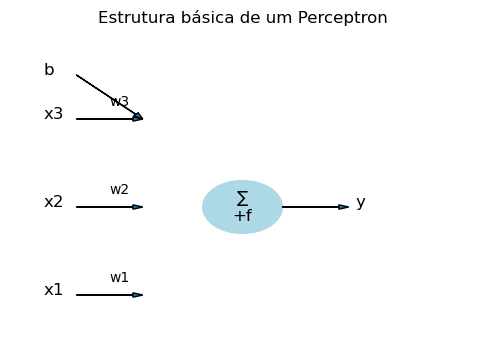

In [1]:
import matplotlib.pyplot as plt

# Gráfico simples da estrutura do Perceptron
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)

# Desenhando as entradas
for i in range(3):
    ax.arrow(0, i*2, 1, 0, head_width=0.1, length_includes_head=True)
    ax.text(-0.5, i*2, f"x{i+1}", fontsize=12)

# Pesos
for i in range(3):
    ax.text(0.5, i*2 + 0.3, f"w{i+1}", fontsize=10)

# Bias
ax.arrow(0, 5, 1, -1, head_width=0.1, length_includes_head=True)
ax.text(-0.5, 5, "b", fontsize=12)

# Neurônio (soma + ativação)
circle = plt.Circle((2.5, 2), 0.6, fill=True, color='lightblue')
ax.add_patch(circle)
ax.text(2.5, 2, "∑\n+f", ha='center', va='center', fontsize=12)

# Saída
ax.arrow(3.1, 2, 1, 0, head_width=0.1, length_includes_head=True)
ax.text(4.2, 2, "y", fontsize=12)

ax.axis('off')
plt.title("Estrutura básica de um Perceptron")
plt.show()

## Fórmulas Matemáticas Detalhadas do Perceptron 📐


A seguir, estão detalhadas as principais fórmulas que regem o funcionamento do Perceptron, com explicações claras de cada etapa.

---

### 1. Soma Ponderada com Bias (Potencial de Ativação)

A primeira operação realizada por um Perceptron é o **cálculo da combinação linear das entradas com os pesos**, somando também o bias (viés).

#### Fórmula:

\\[
u = \\sum_{i=1}^{n} x_i w_i + b
\\]

Ou seja:

\\[
u = x_1 w_1 + x_2 w_2 + x_3 w_3 + \\dots + x_n w_n + b
\\]

#### Onde:
- \\( x_i \\) são as **entradas** (ex: valores de um vetor de características).
- \\( w_i \\) são os **pesos sinápticos**, que indicam a importância de cada entrada.
- \\( b \\) é o **bias**, um valor adicional que permite maior flexibilidade para o limiar da ativação.
- \\( u \\) é o **potencial de ativação**, um valor intermediário antes da função de ativação.

---

### 2. Função de Ativação: Degrau Unitário

Após calcular \\( u \\), aplicamos uma **função de ativação** para decidir se o neurônio "dispara" (saída = 1) ou não (saída = 0). A função mais comum no Perceptron original é o **degrau unitário** (Heaviside).

#### Fórmula:

\\[
f(u) =
\\begin{cases}
1, & \\text{se } u \\geq 0 \\\\
0, & \\text{se } u < 0
\\end{cases}
\\]

#### Por que usar essa função?

- Ela **simula o comportamento de ativação binária** de um neurônio: ou ativa (1) ou não ativa (0).
- Ideal para **tarefas de classificação binária**, como prever 0 ou 1, verdadeiro ou falso.

---

### 3. Função de Custo (Erro Absoluto)

Após obter a saída \\( y \\) do Perceptron, comparamos com a **saída desejada** \\( y_d \\), para avaliar o desempenho do modelo.

#### Fórmula:

\\[
E = y_d - y
\\]

- \\( E \\) é o **erro** da predição.
- \\( y_d \\) é o valor correto (esperado).
- \\( y \\) é o valor previsto pelo Perceptron.

Se \\( E = 0 \\), a predição está correta. Se \\( E \\neq 0 \\), há um erro que será usado para ajustar os pesos.

---

### 4. Regra de Atualização dos Pesos e do Bias

Se o modelo comete erro, ele precisa aprender com isso. A **regra de aprendizado do Perceptron** é baseada no erro e ajusta os pesos e o bias proporcionalmente.

#### Fórmulas:

##### Atualização dos Pesos:

\\[
w_i = w_i + \\eta \\cdot E \\cdot x_i
\\]

##### Atualização do Bias:

\\[
b = b + \\eta \\cdot E
\\]

#### Onde:
- \\( w_i \\): peso da entrada \\( i \\).
- \\( \\eta \\): taxa de aprendizado (*learning rate*), geralmente um valor pequeno como 0.1 ou 0.01.
- \\( E \\): erro obtido.
- \\( x_i \\): valor da entrada.

Essa fórmula garante que:
- Quando o erro é zero, os pesos não são alterados.
- Quando o erro é diferente de zero, os pesos são ajustados na direção que reduz o erro.

---

### 5. Critério de Parada

O treinamento do Perceptron pode parar quando:
1. O erro total nas amostras é igual a zero (o Perceptron aprendeu todas corretamente).
2. Um número fixo de **épocas** (iterações sobre o conjunto de dados) é atingido.

---

## Funcionamento do Algoritmo do Perceptron (Passo a Passo Conceitual)

O Perceptron é um algoritmo de aprendizado supervisionado simples que simula o funcionamento de um neurônio artificial. Ele é utilizado principalmente para **classificação binária**, ou seja, para separar dados em duas classes distintas.



### 1. Inicialização

- O algoritmo começa com a **inicialização dos pesos** (geralmente com valores pequenos ou iguais a zero).
- Também é definido um valor de **bias (viés)**.
- A **taxa de aprendizado** (η) é escolhida — ela determina o "tamanho do passo" durante o ajuste dos pesos.

Esses parâmetros serão ajustados ao longo do treinamento para que o Perceptron aprenda a tomar decisões corretas.


### 2. Apresentação dos Dados

- Os dados de entrada são apresentados **um por um** ao Perceptron.
- Cada dado possui:
  - Um vetor de características (entradas): \\( x_1, x_2, ..., x_n \\)
  - Uma **saída esperada** (classe): 0 ou 1



### 3. Cálculo da Saída

- Para cada amostra, o Perceptron calcula a **soma ponderada das entradas com os pesos**, somando também o bias.
- Em seguida, aplica uma **função de ativação** (normalmente o degrau unitário) que determina se a saída será 0 ou 1.

Essa é a **saída prevista** para aquele padrão.


### 4. Avaliação do Erro

- A saída prevista é comparada com a saída desejada.
- Se estiver correta, nada acontece.
- Se estiver errada, o Perceptron **calcula o erro** (diferença entre a saída desejada e a prevista).


### 5. Atualização dos Pesos e Bias

- Se houver erro, os **pesos e o bias são atualizados** para corrigir a decisão do Perceptron.
- O ajuste depende:
  - Do valor do erro
  - Da taxa de aprendizado
  - Do valor da entrada associada

Dessa forma, o Perceptron vai "aprendendo" com os erros cometidos.



### 6. Repetição por Épocas

- O processo é repetido para **todas as amostras do conjunto de dados**.
- Cada vez que o Perceptron percorre todas as amostras, chamamos de uma **época**.
- Esse ciclo é repetido até que:
  - O Perceptron classifique todos os dados corretamente (erro total = 0), ou
  - Um número máximo de épocas seja atingido



### 7. Convergência do Algoritmo

- Se os dados forem **linearmente separáveis**, o Perceptron sempre convergirá (ou seja, aprenderá a classificá-los corretamente).
- Caso contrário, o Perceptron pode **nunca acertar tudo**, por isso é importante definir um **critério de parada** (ex: 1000 épocas).


### ✅ Resumo Geral

O algoritmo do Perceptron segue este fluxo:

1. Inicializar pesos e bias
2. Para cada entrada:
   - Calcular a saída prevista
   - Comparar com a saída correta
   - Atualizar pesos e bias, se necessário
3. Repetir até o modelo aprender ou atingir o limite de épocas